<a href="https://colab.research.google.com/github/vincentjunitio00/Heart_Disease_Clustering/blob/main/Heart_Disease_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

# Download data

In [2]:
!git clone https://github.com/vincentjunitio00/Heart_Disease_Clustering

Cloning into 'Heart_Disease_Clustering'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 34 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (34/34), done.


# Preprocessing the dataset

Each dataset consists of 76 attributes, distributed to 10 rows for each record and seperated with \n.

In [3]:
def preprocessing(file):
  '''Preprocess the dataset

  Parameter:
  file: the path of the dataset

  Return:
  dataset: the preprocessed dataset
  '''

  file = open(file, "r")

  counter = 0     # to point which current processing row
  records = ''    # to keep the processed records
  dataset = []
  for record in file.readlines():
    records += record.rstrip('\n') + ' '
    counter += 1
    if counter >= 10:
      dataset.append(records.rstrip())
      records = ''
      counter = 0
  return dataset

In [4]:
dataset_cleveland = preprocessing('/content/Heart_Disease_Clustering/cleveland.data')
dataset_hungarian = preprocessing('/content/Heart_Disease_Clustering/hungarian.data')
dataset_longbeach = preprocessing('/content/Heart_Disease_Clustering/long-beach-va.data')
dataset_switzer = preprocessing('/content/Heart_Disease_Clustering/switzerland.data')

# Feature Selection

The features below are selected like the proposed paper, except the last feature mentioned in the paper due to its redundant feature with 'painloc' feature.

In [5]:
used_columns = [0, 2, 3, 40, 17, 15, 4, 50, 11, 9, 37, 31]
used_columns_name = {0: 'id', 2: 'age', 3: 'sex', 40: 'slope', 17: 'famhist', 15:'fbs', 4:'painloc', 50: 'thal', 11: 'chol', 9: 'trestbps', 37: 'exang', 31: 'thalach'}

# Data Preparation

The dataset repository has the preprocessed version for each dataset. The difference between the preprocessed version and the full version (the path read above) is the preprocessed version has selected several attributes and prepared the 'num' feature. Meanwhile, the proposed paper used different features as the preprocessed version, so feature selection from the full version was conducted. The 'num' feature can be used to perform supervised learning, therefore, the 'num' feature is added to our version.

In [6]:
df_cleveland = pd.DataFrame([data.split() for data in dataset_cleveland])
df_used_cleveland = df_cleveland[used_columns].rename(columns=used_columns_name)

f = open('/content/Heart_Disease_Clustering/processed.cleveland.data', 'r')
preprocessed_columns_name = {0:'age', 1: 'sex', 2: 'cp', 3: 'trestbps', 4: 'chol', 5: 'fbs', 6: 'restecg', 7: 'thalach', 8: 'exang', 9: 'oldpeak', 10: 'slope', 11: 'ca', 12: 'thal', 13: 'num'}

df_preprocessed_cleveland = pd.DataFrame([data.rstrip('\n').split(',') for data in f.readlines()]).rename(columns=preprocessed_columns_name)

df_used_cleveland['num'] = df_preprocessed_cleveland['num']

In [7]:
df_hungarian = pd.DataFrame([data.split() for data in dataset_hungarian])
df_used_hungarian = df_hungarian[used_columns].rename(columns=used_columns_name)

f = open('/content/Heart_Disease_Clustering/reprocessed.hungarian.data', 'r')
df_preprocessed_hungarian = pd.DataFrame([data.rstrip('\n').split(' ') for data in f.readlines()]).rename(columns=preprocessed_columns_name)

df_used_hungarian['num'] = df_preprocessed_hungarian['num']

In [8]:
df_longbeach = pd.DataFrame([data.split() for data in dataset_longbeach])
df_used_longbeach = df_longbeach[used_columns].rename(columns=used_columns_name)

f = open('/content/Heart_Disease_Clustering/processed.va.data', 'r')
preprocessed_columns_name = {0:'age', 1: 'sex', 2: 'cp', 3: 'trestbps', 4: 'chol', 5: 'fbs', 6: 'restecg', 7: 'thalach', 8: 'exang', 9: 'oldpeak', 10: 'slope', 11: 'ca', 12: 'thal', 13: 'num'}

df_preprocessed_longbeach = pd.DataFrame([data.rstrip('\n').split(',') for data in f.readlines()]).rename(columns=preprocessed_columns_name)
df_used_longbeach['num'] = df_preprocessed_longbeach['num']

In [9]:
df_switzer = pd.DataFrame([data.split() for data in dataset_switzer])
df_used_switzer = df_switzer[used_columns].rename(columns=used_columns_name)

f = open('/content/Heart_Disease_Clustering/processed.switzerland.data', 'r')
df_preprocessed_switzerland = pd.DataFrame([data.rstrip('\n').split(',') for data in f.readlines()]).rename(columns=preprocessed_columns_name)

df_used_switzerland = df_used_switzer.merge(df_preprocessed_switzerland, how='inner', on=['age', 'trestbps', 'thalach'], suffixes=('','_y'))
df_used_switzerland = df_used_switzerland[['id','age','sex','slope','famhist','fbs','painloc','thal','chol','trestbps','exang','thalach','num']]

After obtaining each dataframe, append all dataframes into a new dataframe.

In [10]:
df = df_used_cleveland.append([df_used_hungarian, df_used_longbeach, df_used_switzerland]).reset_index(drop=True)

In [11]:
df

,id,age,sex,slope,famhist,fbs,painloc,thal,chol,trestbps,exang,thalach,num
0,1,63,1,3,1,1,-9,6,233,145,0,150,0
1,2,67,1,2,1,0,-9,3,286,160,1,108,2
2,3,67,1,2,1,0,-9,7,229,120,1,129,1
3,4,37,1,3,1,0,-9,3,250,130,0,187,0
4,6,41,0,1,1,0,-9,3,204,130,0,172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,4070,54,1,2,-9,-9,1,7,0,180,0,150,1
893,4071,56,1,2,-9,1,1,7,0,125,1,103,3
894,4072,56,1,2,-9,-9,0,7,0,125,0,98,2
895,4073,54,1,2,-9,-9,1,7,0,130,1,110,3


# Data Cleaning

The dataframe has object data type for all features/columns. Change those to integer.

In [12]:
df = df.astype('int')

The unknown value is denoted as -9. Therefore, for each column that has -9 value, change that value to other value.

In [13]:
df['slope'] = df['slope'].replace(-9, 0)      # Replace -9 in slope with 0
df['famhist'] = df['famhist'].replace(-9, 2)  # Replace -9 in famhist with 2 (a new category because contains lots of -9 values)
df['fbs'] = df['fbs'].replace(-9, 0)          # Replace -9 in fbs with 0
df['painloc'] = df['painloc'].replace(-9, 2)  # Replace -9 in painloc with 2 (a new category because contains lots of -9 values)
df['thal'] = df['thal'].replace({-9 : 0, 1: 3, 2: 3, 4: 6, 5: 6})  # Replace each category not in 3, 6 and 7 with the nearest category
df['chol'] = df['chol'].replace(-9, df['chol'].median())    # Replace -9 in chol with median value of chol
df['trestbps'] = df['trestbps'].replace(-9, df['trestbps'].median())    # Replace -9 in trestbps with median value of trestbps
df['exang'] = df['exang'].replace(-9, 0)    # Replace -9 in exang with 0
df['thalach'] = df['thalach'].replace(-9, df['thalach'].median())   # Replace -9 in thalach with median value of thalach

In [14]:
df

,id,age,sex,slope,famhist,fbs,painloc,thal,chol,trestbps,exang,thalach,num
0,1,63,1,3,1,1,2,6,233,145,0,150,0
1,2,67,1,2,1,0,2,3,286,160,1,108,2
2,3,67,1,2,1,0,2,7,229,120,1,129,1
3,4,37,1,3,1,0,2,3,250,130,0,187,0
4,6,41,0,1,1,0,2,3,204,130,0,172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,4070,54,1,2,2,0,1,7,0,180,0,150,1
893,4071,56,1,2,2,1,1,7,0,125,1,103,3
894,4072,56,1,2,2,0,0,7,0,125,0,98,2
895,4073,54,1,2,2,0,1,7,0,130,1,110,3


Change the feature data type to category and integer.

In [15]:
df[['sex', 'slope', 'famhist', 'fbs', 'painloc', 'thal', 'exang']] = df[['sex', 'slope', 'famhist', 'fbs', 'painloc', 'thal', 'exang']].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        897 non-null    int64   
 1   age       897 non-null    int64   
 2   sex       897 non-null    category
 3   slope     897 non-null    category
 4   famhist   897 non-null    category
 5   fbs       897 non-null    category
 6   painloc   897 non-null    category
 7   thal      897 non-null    category
 8   chol      897 non-null    int64   
 9   trestbps  897 non-null    int64   
 10  exang     897 non-null    category
 11  thalach   897 non-null    int64   
 12  num       897 non-null    int64   
dtypes: category(7), int64(6)
memory usage: 49.2 KB


Save target value in 'y' and feature values in 'X'.

In [17]:
X = df.drop(['id', 'num'], axis=1)

In [18]:
y = df['num'].values

# Supervised Learning

Split data into train and test set.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

1. KNN

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
prediction_knn = knn.predict(X_test)

In [22]:
print(classification_report(y_test, prediction_knn))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68        84
           1       0.31      0.29      0.30        42
           2       0.05      0.05      0.05        20
           3       0.46      0.23      0.31        26
           4       0.33      0.12      0.18         8

    accuracy                           0.47       180
   macro avg       0.35      0.29      0.30       180
weighted avg       0.45      0.47      0.45       180



Try KNN with features that are important.

In [23]:
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)

importance = dc.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (X_train.columns[int(i)],v))

Feature: age, Score: 0.16040
Feature: sex, Score: 0.03490
Feature: slope, Score: 0.04185
Feature: famhist, Score: 0.03982
Feature: fbs, Score: 0.02991
Feature: painloc, Score: 0.01992
Feature: thal, Score: 0.05928
Feature: chol, Score: 0.22566
Feature: trestbps, Score: 0.11813
Feature: exang, Score: 0.07894
Feature: thalach, Score: 0.19118


Only take the score > 0.05.

In [24]:
X_train_important = X_train[['age', 'famhist', 'thal', 'chol', 'trestbps', 'exang', 'thalach']]

In [25]:
knn_1 = KNeighborsClassifier(n_neighbors=5)
knn_1.fit(X_train_important, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
X_test_important = X_test[['age', 'famhist', 'thal', 'chol', 'trestbps', 'exang', 'thalach']]
pred_1 = knn_1.predict(X_test_important)

In [27]:
print(classification_report(y_test, pred_1))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68        84
           1       0.31      0.29      0.30        42
           2       0.06      0.05      0.05        20
           3       0.46      0.23      0.31        26
           4       0.33      0.12      0.18         8

    accuracy                           0.47       180
   macro avg       0.35      0.29      0.30       180
weighted avg       0.44      0.47      0.45       180



2. SVM

In [28]:
svc = SVC()
svc.fit(X_train, y_train)

pred_svc = svc.predict(X_test)

print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.55      0.94      0.70        84
           1       0.51      0.45      0.48        42
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00         8

    accuracy                           0.54       180
   macro avg       0.21      0.28      0.24       180
weighted avg       0.38      0.54      0.44       180



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. Random Forest Classifier

In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

pred_rfc = rfc.predict(X_test)

print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        84
           1       0.33      0.31      0.32        42
           2       0.19      0.25      0.22        20
           3       0.36      0.31      0.33        26
           4       0.00      0.00      0.00         8

    accuracy                           0.51       180
   macro avg       0.32      0.33      0.32       180
weighted avg       0.48      0.51      0.49       180



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Unsupervised

Suppose the 'num' or target feature is unknown.

Feature reduction is performed to reduce dimension.

1. Two components

In [30]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
kmeans = KMeans(n_clusters = 5, random_state=42)
kmeans.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [31]:
prediction = kmeans.labels_

In [32]:
print(classification_report(y, prediction))

              precision    recall  f1-score   support

           0       0.64      0.29      0.40       404
           1       0.36      0.32      0.34       191
           2       0.12      0.18      0.14       130
           3       0.12      0.29      0.17       130
           4       0.15      0.07      0.10        42

    accuracy                           0.27       897
   macro avg       0.28      0.23      0.23       897
weighted avg       0.41      0.27      0.30       897



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


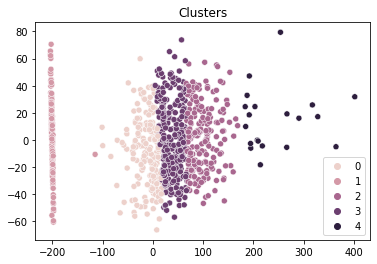

In [33]:
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=prediction)
plt.title('Clusters')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


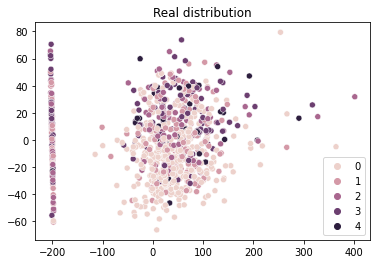

In [34]:
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=df['num'])
plt.title('Real distribution')
plt.legend()
plt.show()

2. Three components

In [35]:
pca_3 = PCA(n_components = 3)
X_pca_3 = pca_3.fit_transform(X)
kmeans_3 = KMeans(n_clusters = 5, random_state=42)
kmeans_3.fit(X_pca_3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [36]:
prediction_3 = kmeans_3.labels_

In [37]:
print(classification_report(y, prediction_3))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45       404
           1       0.36      0.32      0.34       191
           2       0.11      0.18      0.14       130
           3       0.19      0.03      0.05       130
           4       0.03      0.14      0.06        42

    accuracy                           0.29       897
   macro avg       0.24      0.22      0.21       897
weighted avg       0.35      0.29      0.31       897



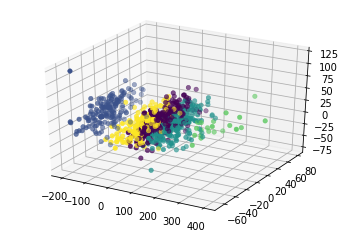

In [38]:
ax = plt.axes(projection='3d')
ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c=prediction_3, cmap='viridis', linewidth=0.5)

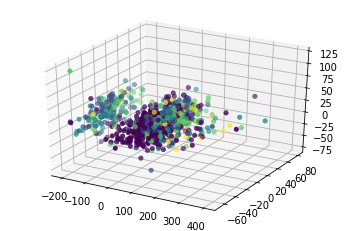

In [39]:
ax = plt.axes(projection='3d')
ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c=df['num'], cmap='viridis', linewidth=0.5)

# Conclusion

Best model is KNN, with 0.47 accuracy. The proposed paper has higher accuracy, which is 0.74, 0.84, 0.89.  